In [1]:
# set up

# python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)

# scikit learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# common import
import pandas as pd
import numpy as np
import os

# make the notebook stable accros runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save the result of figure
PROJECT_ROOT_DIR = ''
CHAPTER_ID = 'Ensambles'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'Images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving Figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)

# Voting Classifier

In [2]:
heads_proba = 0.51 #51%
coin_tosses = (np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses,axis=0) / np.arange(1,10001).reshape(-1,1)
cumulative_heads_ratio.tolist()

[[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 0.0, 0.5, 0.5],
 [0.6666666666666666,
  0.3333333333333333,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  1.0,
  0.0,
  0.3333333333333333,
  0.6666666666666666],
 [0.5, 0.5, 0.5, 0.5, 0.75, 0.5, 1.0, 0.25, 0.25, 0.75],
 [0.6, 0.6, 0.6, 0.4, 0.8, 0.4, 1.0, 0.2, 0.2, 0.8],
 [0.5,
  0.5,
  0.5,
  0.3333333333333333,
  0.6666666666666666,
  0.3333333333333333,
  1.0,
  0.3333333333333333,
  0.3333333333333333,
  0.8333333333333334],
 [0.5714285714285714,
  0.5714285714285714,
  0.42857142857142855,
  0.42857142857142855,
  0.7142857142857143,
  0.2857142857142857,
  1.0,
  0.2857142857142857,
  0.42857142857142855,
  0.7142857142857143],
 [0.5, 0.625, 0.5, 0.375, 0.625, 0.25, 0.875, 0.375, 0.5, 0.75],
 [0.4444444444444444,
  0.5555555555555556,
  0.5555555555555556,
  0.4444444444444444,
  0.6666666666666666,
  0.3333333333333333,
  0.7777777777777778,
  0.333333333333333

In [3]:
coin_tosses

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

Saving Figure law_of_large_numbers_plot


C:\Users\User\AppData\Local\Temp\ipykernel_13304\617383281.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


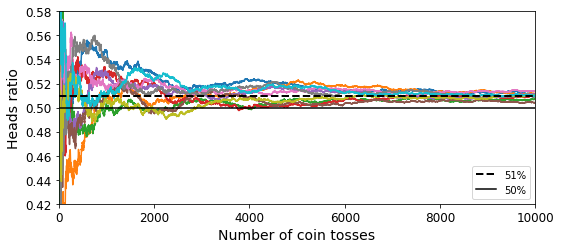

In [4]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()

In [10]:
# use the moons dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.3, random_state=42)
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


(500, 2)
(500,)


In [11]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(375, 2)
(375,)
(125, 2)
(125,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',random_state=42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr',log_clf),
        ('rf',rnd_clf),
        ('svc',svm_clf)
    ],
    voting='hard'
)

In [15]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [16]:
#hard voting
from sklearn.metrics import accuracy_score # validasi for classification

for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , accuracy_score(y_test,y_pred))
    

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# NOTE :
- used the hard voting -> predictor used the different algorithm and get the ressult on the predict the label result of testing dataset (1,0) if many algortihm take result majority voting the result is 1 => 1 is the result, although the predict proba score on the calculate is 0 more higher

- Used the soft voting -> predictor used the different algorithm and get the result on the predict the label result of testing dataset (1,0) suitable on high score probability at predictor algorithm aggregate to the label probability, which the label high probability is the result (like is 1), although the predictor algorithm more high majority is 0.

In [17]:
# soft voting
# => need all class estimate class probability, if not 
# -> used probability hyperparameter
log_clf = LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',probability=True,random_state = 42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf), 
        ('rf', rnd_clf), 
        ('svc', svm_clf)
    ],
    voting='soft')
voting_clf.fit(X_train,y_train)



VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [18]:
from sklearn.metrics import accuracy_score

for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Noted
- Hard margin often achieves a higher accuracy than the
best classifier in the ensemble
- Soft margin often achieves higher performance than hard voting because it gives more
weight to highly confident votes

# Bagging and Pasting
Pada voting original is used the different the algorithm, one way diverse classifier  algorithm is using very different algorithm => this will be increase the change that will make very different type of erors, will be improve the ensamble accuracy

How to make the same algorithm on the ensamle ?
=> used the Baging and pasting by on different  the random subset training data set, we call that is (Sample)

- Bagging is used if performared with replacement
- Pasting is used if performared not with replacement

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,
    bootstrap=True,random_state=42
) 
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.904

In [21]:
# baseline -> without bagging classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.856

dapat dilihat bahwa accuracy score pada sebuah baseline dengan bagging memiliki nilai yang lebih baik jika menggunakan sebuah baseline

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving Figure decision_tree_without_and_with_bagging_plot


C:\Users\User\AppData\Local\Temp\ipykernel_13304\617383281.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


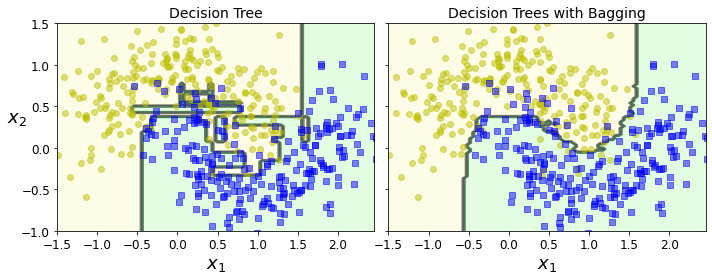

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()